In [239]:
# importations
import mne, numpy as np, pandas as pd, os, glob, sys
# from mne.preprocessing import ICA
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [240]:
from tensorpac import Pac
from tensorpac.signals import pac_signals_tort

In [241]:
processed_dir = './preprocessed_final/sub03_ses00_final_2-epo.fif'
epochs = mne.read_epochs(processed_dir)
epochs.plot(scalings=dict(eeg=6e-5, eog=1e-4));

KeyboardInterrupt: 

______________________

## Doing the whole thing in loop:

In [ ]:
## POINTING TO FOLDERS CONTAINING: 1. PREPROCESSED DATA 2. RAW NPZ/ETC
datapath='./nmod/'
preprocs=(glob.glob(os.path.abspath('./preprocessed_final/*final_2-epo.fif')))


In [ ]:
preprocs[0]

'c:\\Users\\taham\\data\\preprocessed_final\\sub03_ses00_final_2-epo.fif'

In [ ]:
assert len(preprocs) > 0, 'No preprocessed data found in ./preprocessed_final/'
assert os.path.isdir(datapath), 'No data found in {}'.format(datapath)
print('paths are good')

paths are good


In [ ]:
fifs=pd.DataFrame(preprocs, columns=['fifs'], 
                 index=pd.MultiIndex.from_tuples(
                     [(
                       str(int(i.split('\\')[-1].split('_')[0][3:])),
                       str(i.split('\\')[-1].split('_')[1][3:])
                       ) for i in preprocs],
                       names=['sid','sess']
                                                 )
                   ).sort_index()

In [ ]:
def finder(datapath):
    filesDepth5 = glob.glob(datapath+'/*/*/*/*/*')
    dirsDepth5 = filter(lambda f: os.path.isdir(f), filesDepth5)

    markers=np.sort(np.array([os.path.abspath(f) for f in filesDepth5 if f.endswith('.pkl')]))
    npzs=np.sort(np.array([os.path.abspath(f) for f in filesDepth5 if f.endswith('.npz')]))
    return markers, npzs

Getting the paths to `npz`s and `pkl`s that we got:

In [ ]:
markers, npzs=finder(datapath)
marker_sids=pd.DataFrame([i.split("\\")[-5] for i in markers], columns=['sid'])
npz_sids=pd.DataFrame([i.split("\\")[-5] for i in npzs], columns=['sid'])
fs=marker_sids.join(pd.DataFrame(markers, columns=['markers'])).join(pd.DataFrame(npzs, columns=['npzs']).join(pd.DataFrame([i.split("\\")[-1].split('_')[1] for i in markers], columns=['sess']))).set_index(['sid', 'sess']).sort_index()

Getting the markers, and preprocessed paths into one df:

Adding the markers to the same df:
[we'll add results in the same df later]

In [ ]:
fileindex=fifs.join(fs)
hdrs=pd.DataFrame(index=fileindex.index, columns=['stimint', 'stimcont', 'clinscore', 'hemisphere', 'patientid'])
for ind in fileindex.dropna(how='any').index:
    _mfile=fileindex.loc[ind, 'markers']
    _marker=pd.read_pickle(_mfile)
    hdrs.loc[ind]['stimint']=_marker['stimInt']
    hdrs.loc[ind]['stimcont']=_marker['stimCont']
    hdrs.loc[ind]['clinscore']=_marker['clinScore']
    hdrs.loc[ind]['hemisphere']=_marker['hemisphere']
    hdrs.loc[ind]['patientid']=_marker['patientId']
fileindex=fileindex.join(hdrs)    

In [ ]:
fileindex

fifs  \
sid sess                                                      
22  00    c:\Users\taham\data\preprocessed_final\sub22_s...   
    01    c:\Users\taham\data\preprocessed_final\sub22_s...   
    02    c:\Users\taham\data\preprocessed_final\sub22_s...   
    03    c:\Users\taham\data\preprocessed_final\sub22_s...   
    04    c:\Users\taham\data\preprocessed_final\sub22_s...   
    05    c:\Users\taham\data\preprocessed_final\sub22_s...   
    06    c:\Users\taham\data\preprocessed_final\sub22_s...   
    07    c:\Users\taham\data\preprocessed_final\sub22_s...   
    08    c:\Users\taham\data\preprocessed_final\sub22_s...   
    09    c:\Users\taham\data\preprocessed_final\sub22_s...   
    10    c:\Users\taham\data\preprocessed_final\sub22_s...   
    11    c:\Users\taham\data\preprocessed_final\sub22_s...   
    13    c:\Users\taham\data\preprocessed_final\sub22_s...   
26  00    c:\Users\taham\data\preprocessed_final\sub26_s...   
    01    c:\Users\taham\data\preprocessed_final\sub26_s...   
    02    c:\Users\taham\data\preprocessed_final\sub26_s...   
    03    c:\Users\taham\data\preprocessed_final\sub26_s...   
    04    c:\Users\taham\data\preprocessed_final\sub26_s...   
    05    c:\Users\taham\data\preprocessed_final\sub26_s...   
    06    c:\Users\taham\data\preprocessed_final\sub26_s...   
    07    c:\Users\taham\data\preprocessed_final\sub26_s...   
    08    c:\Users\taham\data\preprocessed_final\sub26_s...   
    09    c:\Users\taham\data\preprocessed_final\sub26_s...   
    10    c:\Users\taham\data\preprocessed_final\sub26_s...   
3   00    c:\Users\taham\data\preprocessed_final\sub03_s...   
    01    c:\Users\taham\data\preprocessed_final\sub03_s...   
    02    c:\Users\taham\data\preprocessed_final\sub03_s...   
    03    c:\Users\taham\data\preprocessed_final\sub03_s...   
    04    c:\Users\taham\data\preprocessed_final\sub03_s...   
    05    c:\Users\taham\data\preprocessed_final\sub03_s...   
    06    c:\Users\taham\data\preprocessed_final\sub03_s...   
    07    c:\Users\taham\data\preprocessed_final\sub03_s...   
    08    c:\Users\taham\data\preprocessed_final\sub03_s...   
    09    c:\Users\taham\data\preprocessed_final\sub03_s...   
    10    c:\Users\taham\data\preprocessed_final\sub03_s...   

                                                    markers  \
sid sess                                                      
22  00    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    01    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    02    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    03    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    04    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    05    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    06    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    07    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    08    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    09    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    10    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    11    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    13    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
26  00    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    01    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    02    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    03    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    04    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    05    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    06    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    07    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    08    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    09    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    10    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
3   00    c:\Users\taham\data\nmod\3\raw\D1\left_r\run_0...   
    01    c:\Users\tah

*temporary -- will be functionalized:*

In [ ]:
sid='22'
sess='01'

In [ ]:
## METADATA:
sf=1000


Try with one subject:

In [ ]:
fif_file=fileindex.fifs.loc[sid,sess] ## path to preprocessed file
epochs = mne.read_epochs(fif_file)
_data = epochs.get_data()[:,14,:]

Reading c:\Users\taham\data\preprocessed_final\sub22_ses01_final_2-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
fif_file=fileindex.fifs.loc[sid,sess] ## path to preprocessed file
epochs = mne.read_epochs(fif_file)
_data = epochs.get_data()[:,14,:]

## METADATA:
sf=1000

p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 250, 5, 5), dcomplex='wavelet')
print('starting the phase sims   ', end='\r')
phases = p.filter(sf, _data, ftype='phase', n_jobs=8)
print('starting the amps sims      ', end='\r')
amplitudes = p.filter(sf, _data, ftype='amplitude', n_jobs=8)
xpax = p.fit(phases, amplitudes)

Reading c:\Users\taham\data\preprocessed_final\sub22_ses01_final_2-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated


Phase Amplitude Coupling object defined


    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=6494)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)


Returns the modulation in `xpax` with this att:
> *Phase-Amplitude Coupling measure of shape (n_amp, n_pha, n_epochs)*
>
> ref: https://etiennecmb.github.io/tensorpac/generated/tensorpac.Pac.html#tensorpac.Pac.fit

We see the shape: (39, 145, 24)

So, n_amp=39 / n_pha=145 / n_epochs=24

#### Notes from meeting:
- bandstop 120-140
- Channel to use: C3 >> average across the selected ones
- Frequency blob to integrate

In [ ]:
ph_fs=(20.1,39.9) #frequency from phase -- to zoom in on
amp_fs=(122.5,222.5) #frequency from amplitude -- to zoom in on
_filtered=pd.DataFrame(xpax.mean(-1), index=np.round(p.yvec, 1), columns=np.round(p.xvec, 1)).loc[amp_fs[0]:amp_fs[1], ph_fs[0]:ph_fs[1]]
avgpx=_filtered.sum().sum()/(_filtered.shape[0]*_filtered.shape[1])

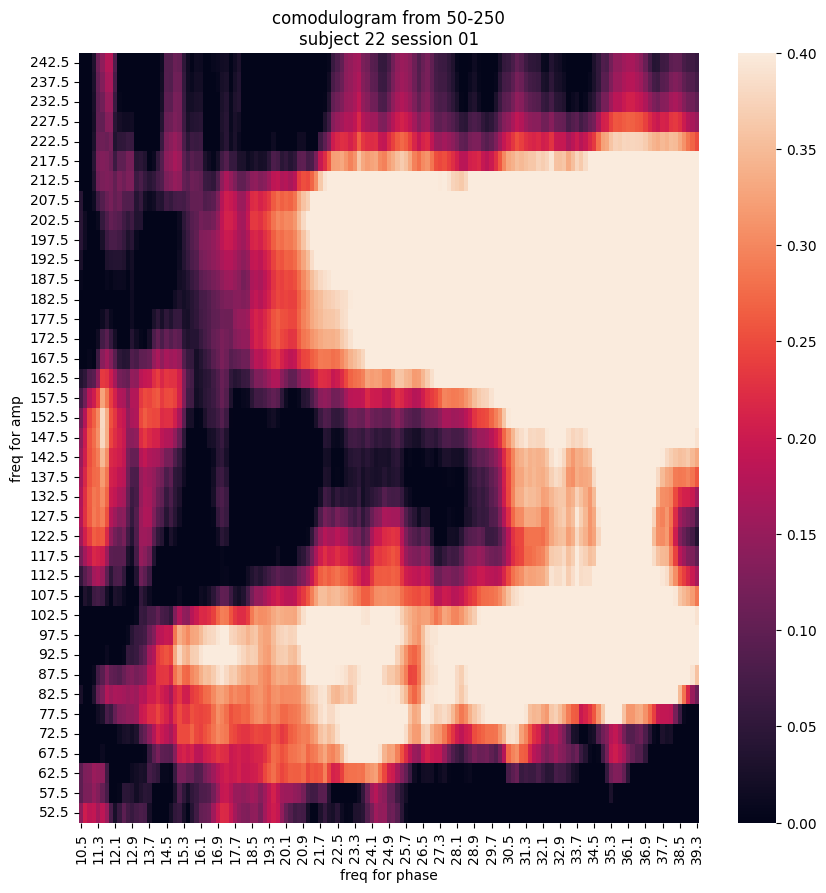

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(pd.DataFrame(xpax.mean(-1), index=np.round(p.yvec, 1), columns=np.round(p.xvec, 1)), vmin=0, vmax=0.4, mask=p.pvalues==0);
plt.xlabel('freq for phase')
plt.ylabel('freq for amp')
plt.title('comodulogram from 50-250\nsubject {sid} session {sess}'.format(sid=sid, sess=sess))
ax.invert_yaxis()
plt.suptitle('')
plt.show()

Let's do this for all trials in subject 22 - get the modulation indices and put it in a new df:

In [ ]:
pacs=pd.DataFrame(index=fileindex.dropna(how='any').index, columns=['pacint'])
pacs

pacint
sid sess       
22  00      NaN
    01      NaN
    02      NaN
    03      NaN
    04      NaN
    05      NaN
    06      NaN
    07      NaN
    08      NaN
    09      NaN
    10      NaN
    11      NaN
    13      NaN
26  00      NaN
    01      NaN
    02      NaN
    03      NaN
    04      NaN
    05      NaN
    06      NaN
    07      NaN
    08      NaN
    09      NaN
    10      NaN
3   00      NaN
    01      NaN
    02      NaN
    03      NaN
    04      NaN
    05      NaN
    06      NaN
    07      NaN
    08      NaN
    09      NaN
    10      NaN

specify what frequency blob to average over:
[we'll get the sums and then average for those pixels]

In [ ]:
ph_fs=(20.1,39.9) #frequency from phase -- to zoom in on
amp_fs=(122.5,222.5) #frequency from amplitude -- to zoom in on

Putting it in `pacs` df:

In [435]:
from time import time, strftime

In [445]:
time()

1669615313.8114064

In [446]:
t1=time()
t3=t1
for n, i in enumerate(fileindex.dropna(how='any').index):
    t2=t3
    fif_file=fileindex.fifs.loc[i] ## path to preprocessed file
    epochs = mne.read_epochs(fif_file)
    _data = epochs.get_data()[:,14,:]
    
    sid=str(i[0])
    sess=str(i[1])
    print('sid', sid, 'sess', sess, '    ', end='\r')
    
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 250, 5, 5), dcomplex='wavelet', verbose=False)
    # print('starting the phase sims   ', end='\r')
    phases = p.filter(sf, _data, ftype='phase', n_jobs=12)
    # print('starting the amps sims      ', end='\r')
    amplitudes = p.filter(sf, _data, ftype='amplitude', n_jobs=12)
    xpax = p.fit(phases, amplitudes)
    
    ## GET TOTAL PAC VAL FOR WINDOW AND PUT IN DF:
    _meanpax=pd.DataFrame(xpax.mean(-1), index=np.round(p.yvec, 1), columns=np.round(p.xvec, 1))
    _filtered=_meanpax.loc[amp_fs[0]:amp_fs[1], ph_fs[0]:ph_fs[1]]

    avgpxl=_filtered.sum().sum()/(_filtered.shape[0]*_filtered.shape[1]) # get the average pixel for the filtered window
    pacs.loc[i]['pacint']=avgpxl
    xpax.dump(os.path.join('pax','pax_{sid}_{sess}.npy'.format(sid=sid, sess=sess)))
    t3=time()
    deltat=t3-t2
    print('took {deltat} seconds for one loop. loop {n} done.'.format(deltat=deltat, n=n), end='\r')
    # plt.figure(figsize=(10,10))
    # ax = sns.heatmap(pd.DataFrame(xpax.mean(-1), index=np.round(p.yvec, 1), columns=np.round(p.xvec, 1)), vmin=0, vmax=0.4, mask=p.pvalues==0);
    # plt.xlabel('freq for phase')
    # plt.ylabel('freq for amp')
    # plt.title('comodulogram from 50-250\nsubject {sid} session {sess}'.format(sid=sid, sess=sess))
    # ax.invert_yaxis()
    # plt.show()

In [450]:
pax=pd.DataFrame(index=fileindex.dropna(how='any').index, columns=['xpax'])
for i in pax.index:
    print(i)
    sid=str(i[0])
    sess=str(i[1])
    pax.loc[i]['xpax']=np.load(os.path.join('pax','pax_{sid}_{sess}.npy'.format(sid=sid, sess=sess)), allow_pickle=True)

('22', '00')
('22', '01')
('22', '02')
('22', '03')
('22', '04')
('22', '05')
('22', '06')
('22', '07')
('22', '08')
('22', '09')
('22', '10')
('22', '11')
('22', '13')
('26', '00')
('26', '01')
('26', '02')
('26', '03')
('26', '04')
('26', '05')
('26', '06')
('26', '07')
('26', '08')
('26', '09')
('26', '10')
('3', '00')
('3', '01')
('3', '02')
('3', '03')
('3', '04')
('3', '05')
('3', '06')
('3', '07')
('3', '08')
('3', '09')
('3', '10')


In [479]:
_means=pd.concat([pd.DataFrame(pax.loc[i]['xpax'].mean(-1),index=np.round(p.yvec, 1), columns=np.round(p.xvec, 1)) for i in pax.index], keys=pax.index, names=['sid','sess', 'f_amp'])
_means.columns.name='f_pha'
_means.to_csv('pac_means.csv')

In [482]:
_means.mean(level='sess')

f_pha,10.5,10.7,10.9,11.1,11.3,11.5,11.7,11.9,12.1,12.3,...,37.5,37.7,37.9,38.1,38.3,38.5,38.7,38.9,39.1,39.3
sess,,,,,,,,,,,,,,,,,,,,,
00,-0.000806,0.000682,0.008440,0.006055,0.005215,-0.008162,-0.006441,0.009546,0.035670,0.052348,...,0.144138,0.141111,0.132085,0.123198,0.117001,0.111806,0.113059,0.118956,0.130144,0.136899
01,0.065791,0.061169,0.048247,0.070506,0.098783,0.113995,0.096185,0.074492,0.056847,0.057891,...,0.196324,0.187181,0.185199,0.180630,0.172241,0.160745,0.152194,0.146812,0.149096,0.138759
02,-0.000139,0.027090,0.020966,0.031885,0.032354,0.022865,0.024581,0.048550,0.050194,0.032417,...,0.030043,0.034665,0.026151,0.024835,0.024892,0.035796,0.044072,0.044023,0.047053,0.049930
03,0.022549,0.025112,0.023397,0.033102,0.035538,0.038568,0.054329,0.055077,0.049637,0.049768,...,0.030010,0.032680,0.037538,0.037897,0.038002,0.039277,0.036277,0.036510,0.038466,0.042518
04,-0.036752,-0.023178,0.003317,0.008757,0.010507,-0.004413,-0.016361,0.001609,0.000283,-0.012438,...,-0.004942,-0.007679,-0.000793,-0.002239,-0.000614,-0.007010,-0.001692,-0.000099,-0.002013,-0.004172
05,-0.001850,0.006254,0.001656,-0.011941,-0.020920,0.015010,0.010626,-0.005477,-0.000834,-0.004535,...,0.014034,0.018709,0.018753,0.023054,0.022943,0.027176,0.035533,0.040305,0.042351,0.044561
06,-0.000098,0.010245,0.005790,0.010329,-0.000435,0.012587,0.007380,0.007868,0.007580,-0.004541,...,0.043624,0.048613,0.034486,0.021353,0.018943,0.017594,0.020496,0.016704,0.011588,0.018728
07,-0.013483,-0.002861,0.010455,0.025814,0.029342,0.008127,0.002721,0.003850,0.005226,0.001880,...,0.065949,0.056010,0.055065,0.052914,0.057476,0.054018,0.049642,0.041452,0.042039,0.051870
08,0.040682,0.030826,0.022534,0.030105,0.024049,0.012834,0.007372,-0.021265,-0.015822,-0.010149,...,0.043798,0.040083,0.044553,0.043350,0.047391,0.045314,0.044832,0.040684,0.039730,0.038196


Let's plot both clinscore and pacscore together:

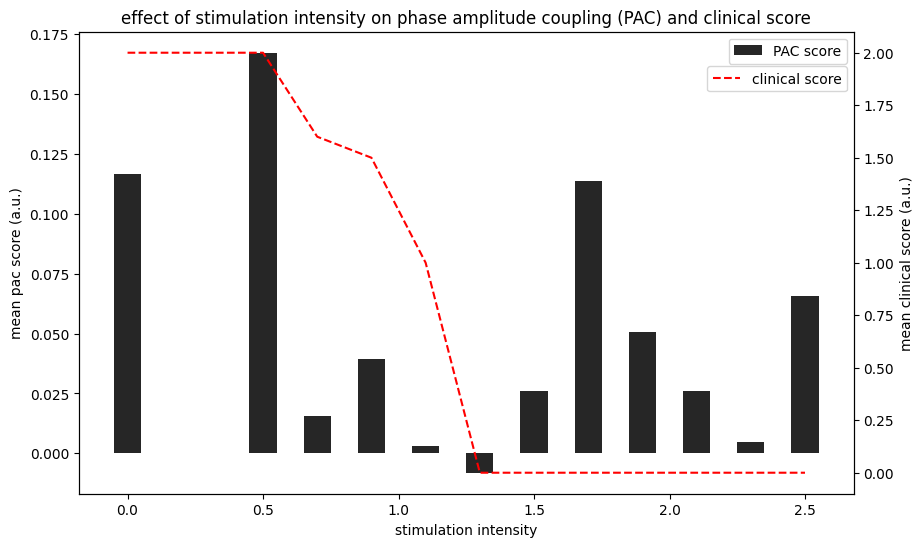

In [576]:
fig,ax1=plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.bar(x=pacscore.groupby('stimint').mean().index, height=pacscore.groupby('stimint').mean()['pacint'], color='k', label='PAC score', width=0.1, alpha=0.85);
ax2.plot(fileindex.groupby('stimint')['clinscore'].mean(),'r--', label='clinical score');
ax1.set(xlabel='stimulation intensity',
       ylabel='mean pac score (a.u.)',
       title='effect of stimulation intensity on phase amplitude coupling (PAC) and clinical score');
ax2.set(ylabel='mean clinical score (a.u.)')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
plt.show();

### Now let's see only for positive PAC:

In [ ]:
ph_fs=(20.1,39.9) #frequency from phase -- to zoom in on
amp_fs=(122.5,222.5) #frequency from amplitude -- to zoom in on
_filtered=pd.DataFrame(xpax.mean(-1), index=np.round(p.yvec, 1), columns=np.round(p.xvec, 1)).loc[amp_fs[0]:amp_fs[1], ph_fs[0]:ph_fs[1]]
avgpx=_filtered.sum().sum()/(_filtered.shape[0]*_filtered.shape[1])

f_pha
10.5    0.104209
10.7    0.024023
10.9    0.016442
11.1    0.053006
11.3    0.022596
          ...   
38.5   -0.110953
38.7   -0.090457
38.9   -0.111660
39.1   -0.098899
39.3   -0.066258
Name: (22, 00, 52.5), Length: 145, dtype: float64

In [603]:
for i in zip(_means.index.get_level_values(0), _means.index.get_level_values(1)):
    _means.loc[i,:]

In [582]:
_filtered=pax.iloc[0].mean(-1).loc[amp_fs[0]:amp_fs[1], ph_fs[0]:ph_fs[1]]
avgpx=_filtered.sum().sum()/(_filtered.shape[0]*_filtered.shape[1])

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [580]:
for i in pax.index:


MultiIndex([('22', '00'),
            ('22', '01'),
            ('22', '02'),
            ('22', '03'),
            ('22', '04'),
            ('22', '05'),
            ('22', '06'),
            ('22', '07'),
            ('22', '08'),
            ('22', '09'),
            ('22', '10'),
            ('22', '11'),
            ('22', '13'),
            ('26', '00'),
            ('26', '01'),
            ('26', '02'),
            ('26', '03'),
            ('26', '04'),
            ('26', '05'),
            ('26', '06'),
            ('26', '07'),
            ('26', '08'),
            ('26', '09'),
            ('26', '10'),
            ( '3', '00'),
            ( '3', '01'),
            ( '3', '02'),
            ( '3', '03'),
            ( '3', '04'),
            ( '3', '05'),
            ( '3', '06'),
            ( '3', '07'),
            ( '3', '08'),
            ( '3', '09'),
            ( '3', '10')],
           names=['sid', 'sess'])

In [265]:
fileindex.join(pacs)

fifs  \
sid sess                                                      
22  00    c:\Users\taham\data\preprocessed_final\sub22_s...   
    01    c:\Users\taham\data\preprocessed_final\sub22_s...   
    02    c:\Users\taham\data\preprocessed_final\sub22_s...   
    03    c:\Users\taham\data\preprocessed_final\sub22_s...   
    04    c:\Users\taham\data\preprocessed_final\sub22_s...   
    05    c:\Users\taham\data\preprocessed_final\sub22_s...   
    06    c:\Users\taham\data\preprocessed_final\sub22_s...   
    07    c:\Users\taham\data\preprocessed_final\sub22_s...   
    08    c:\Users\taham\data\preprocessed_final\sub22_s...   
    09    c:\Users\taham\data\preprocessed_final\sub22_s...   
    10    c:\Users\taham\data\preprocessed_final\sub22_s...   
    11    c:\Users\taham\data\preprocessed_final\sub22_s...   
    13    c:\Users\taham\data\preprocessed_final\sub22_s...   
26  00    c:\Users\taham\data\preprocessed_final\sub26_s...   
    01    c:\Users\taham\data\preprocessed_final\sub26_s...   
    02    c:\Users\taham\data\preprocessed_final\sub26_s...   
    03    c:\Users\taham\data\preprocessed_final\sub26_s...   
    04    c:\Users\taham\data\preprocessed_final\sub26_s...   
    05    c:\Users\taham\data\preprocessed_final\sub26_s...   
    06    c:\Users\taham\data\preprocessed_final\sub26_s...   
    07    c:\Users\taham\data\preprocessed_final\sub26_s...   
    08    c:\Users\taham\data\preprocessed_final\sub26_s...   
    09    c:\Users\taham\data\preprocessed_final\sub26_s...   
    10    c:\Users\taham\data\preprocessed_final\sub26_s...   
3   00    c:\Users\taham\data\preprocessed_final\sub03_s...   
    01    c:\Users\taham\data\preprocessed_final\sub03_s...   
    02    c:\Users\taham\data\preprocessed_final\sub03_s...   
    03    c:\Users\taham\data\preprocessed_final\sub03_s...   
    04    c:\Users\taham\data\preprocessed_final\sub03_s...   
    05    c:\Users\taham\data\preprocessed_final\sub03_s...   
    06    c:\Users\taham\data\preprocessed_final\sub03_s...   
    07    c:\Users\taham\data\preprocessed_final\sub03_s...   
    08    c:\Users\taham\data\preprocessed_final\sub03_s...   
    09    c:\Users\taham\data\preprocessed_final\sub03_s...   
    10    c:\Users\taham\data\preprocessed_final\sub03_s...   

                                                    markers  \
sid sess                                                      
22  00    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    01    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    02    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    03    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    04    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    05    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    06    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    07    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    08    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    09    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    10    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    11    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
    13    c:\Users\taham\data\nmod\22\raw\D1\left_r\run_...   
26  00    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    01    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    02    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    03    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    04    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    05    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    06    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    07    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    08    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    09    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
    10    c:\Users\taham\data\nmod\26\raw\D1\left_r\run_...   
3   00    c:\Users\taham\data\nmod\3\raw\D1\left_r\run_0...   
    01    c:\Users\tah

In [284]:
pacscore.loc['22']

,stimint,pacint
sess,,
00,0,0.192926
01,0.5,0.522846
02,0.7,0.033256
03,0.9,0.072815
04,1.1,0.035478
05,1.3,-0.025323
06,1.5,0.032739
07,1.7,0.024984
08,1.9,-0.000334


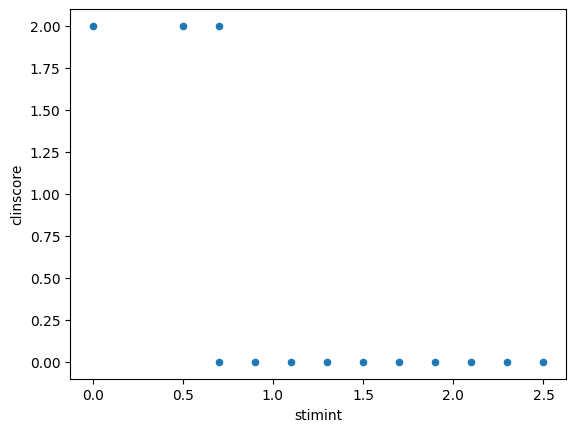

In [377]:
fileindex.loc['22',['stimint','clinscore']].dropna(how='any').plot(kind='scatter', x='stimint', y='clinscore');plt.show()

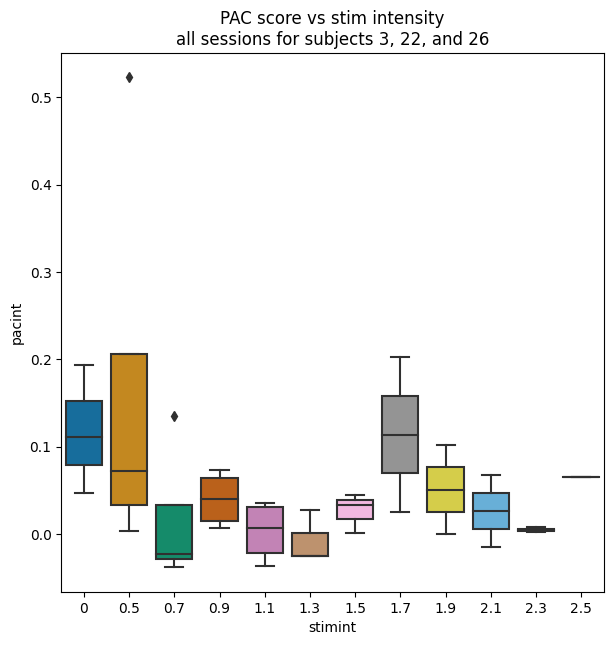

In [367]:
fig,ax=plt.subplots(figsize=(7,7))
# sns.scatterplot(x='stimint', y='pacint', data=pacscore, ax=ax, hue='sid')
sns.boxplot(x='stimint', y='pacint', data=pacscore, ax=ax, palette='colorblind')
# [pacscore.plot(kind='scatter', x='stimint', y='pacint', ax=ax, legend=False, label=i) for i in pacscore.index.get_level_values(0).unique()]
# plt.legend()
ax.set(title='PAC score vs stim intensity\nall sessions for subjects 3, 22, and 26');
plt.show()

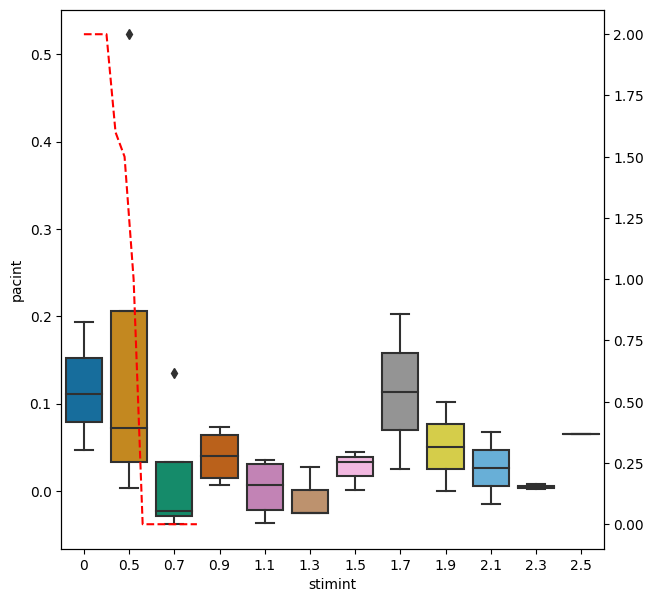

In [606]:
fig,ax1=plt.subplots(figsize=(7,7))
ax2=ax1.twinx()
# sns.scatterplot(x='stimint', y='pacint', data=pacscore, ax=ax, hue='sid')
sns.boxplot(x='stimint', y='pacint', data=pacscore, ax=ax1, palette='colorblind')
ax2.plot(fileindex.groupby('stimint')['clinscore'].mean(),'r--', label='clinical score');
# [pacscore.plot(kind='scatter', x='stimint', y='pacint', ax=ax, legend=False, label=i) for i in pacscore.index.get_level_values(0).unique()]
# plt.legend()
ax.set(title='PAC score vs stim intensity\nall sessions for subjects 3, 22, and 26');
plt.show()

In [387]:
newpacs=pacs.join(fileindex[['clinscore', 'stimint']])

In [398]:
pvals=pd.DataFrame(index=newpacs.index, columns=['p', 't'])
pvals

p    t
sid sess          
22  00    NaN  NaN
    01    NaN  NaN
    02    NaN  NaN
    03    NaN  NaN
    04    NaN  NaN
    05    NaN  NaN
    06    NaN  NaN
    07    NaN  NaN
    08    NaN  NaN
    09    NaN  NaN
    10    NaN  NaN
    11    NaN  NaN
    13    NaN  NaN
26  00    NaN  NaN
    01    NaN  NaN
    02    NaN  NaN
    03    NaN  NaN
    04    NaN  NaN
    05    NaN  NaN
    06    NaN  NaN
    07    NaN  NaN
    08    NaN  NaN
    09    NaN  NaN
    10    NaN  NaN
3   00    NaN  NaN
    01    NaN  NaN
    02    NaN  NaN
    03    NaN  NaN
    04    NaN  NaN
    05    NaN  NaN
    06    NaN  NaN
    07    NaN  NaN
    08    NaN  NaN
    09    NaN  NaN
    10    NaN  NaN

In [413]:
newpacs.loc[sid, sess]['pacint']

0.002125388674085387

In [412]:
st.ttest_ind(newpacs.loc[sid, sess]['pacint'], newpacs.loc[sid, '00']['pacint'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [403]:
for sid in newpacs.index.get_level_values(0).unique():
    print(sid, end='\r')
    for sess in newpacs.loc[sid].index:
        if not np.isnan(newpacs.loc[sid, sess]['pacint']):
            p,t=st.ttest_1samp(newpacs.loc[sid, sess]['pacint'], newpacs.loc[sid, '00']['pacint'])
            pvals.loc[sid, sess]['p']=p
            pvals.loc[sid, sess]['t']=t

In [400]:
pvals

p    t
sid sess          
22  00    NaN  NaN
    01    NaN  NaN
    02    NaN  NaN
    03    NaN  NaN
    04    NaN  NaN
    05    NaN  NaN
    06    NaN  NaN
    07    NaN  NaN
    08    NaN  NaN
    09    NaN  NaN
    10    NaN  NaN
    11    NaN  NaN
    13    NaN  NaN
26  00    NaN  NaN
    01    NaN  NaN
    02    NaN  NaN
    03    NaN  NaN
    04    NaN  NaN
    05    NaN  NaN
    06    NaN  NaN
    07    NaN  NaN
    08    NaN  NaN
    09    NaN  NaN
    10    NaN  NaN
3   00    NaN  NaN
    01    NaN  NaN
    02    NaN  NaN
    03    NaN  NaN
    04    NaN  NaN
    05    NaN  NaN
    06    NaN  NaN
    07    NaN  NaN
    08    NaN  NaN
    09    NaN  NaN
    10    NaN  NaN

In [300]:
pacscore.index = pacscore.index.set_levels([pacscore.index.levels[0].astype(int), pacscore.index.levels[1].astype(int)])

In [309]:
import scipy.stats as st

In [325]:
pacscore.loc[22].loc[2:]

,stimint,pacint
sess,,
2,0.7,0.033256
3,0.9,0.072815
4,1.1,0.035478
5,1.3,-0.025323
6,1.5,0.032739
7,1.7,0.024984
8,1.9,-0.000334
9,2.1,-0.015514
10,2.3,0.007509


In [330]:
pacscore

stimint    pacint
sid sess                  
22  0          0  0.192926
    1        0.5  0.522846
    2        0.7  0.033256
    3        0.9  0.072815
    4        1.1  0.035478
    5        1.3 -0.025323
    6        1.5  0.032739
    7        1.7  0.024984
    8        1.9 -0.000334
    9        2.1 -0.015514
    10       2.3  0.007509
    11       2.5  0.065601
    13       0.7 -0.038147
26  0          0  0.046275
    1        0.5   0.00334
    2        0.7 -0.029044
    3        0.9   0.01774
    4        1.1  0.029483
    5        1.3  0.026796
    6        1.5  0.000469
    7        0.5  0.042271
    8        0.7 -0.023379
    9        0.9  0.061466
    10       1.1 -0.036941
3   0          0  0.110486
    1        0.5   0.10067
    2        0.7  0.135328
    3        0.9  0.006207
    4        1.1 -0.016386
    5        1.3 -0.025857
    6        1.5  0.044589
    7        1.7  0.202199
    8        1.9  0.101667
    9        2.1  0.067829
    10       2.3  0.002125

In [329]:
for i in [22,26,3]: print(i, ",", st.pearsonr(pacscore.loc[i].stimint, pacscore.loc[i].pacint))

22 , PearsonRResult(statistic=-0.4705076988858704, pvalue=0.10466630319091481)
26 , PearsonRResult(statistic=-0.22691439060493168, pvalue=0.5022288210677017)
3 , PearsonRResult(statistic=-0.15201845588540602, pvalue=0.655447568744977)


In [649]:
st.ttest_ind(sess.sum(), sess0.sum())

Ttest_indResult(statistic=-6.254088180178091, pvalue=1.4406631393380274e-09)

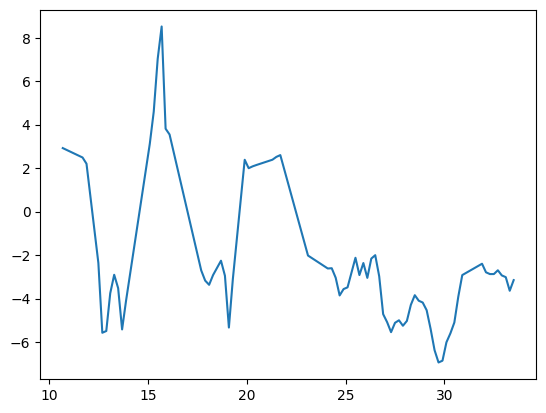

In [647]:
mask=p<0.05
plt.plot(sess.columns[mask], t[mask]); plt.show()

In [663]:
pvals=pvals.astype(float)
for i in _means.index.get_level_values(0).unique():
    subj=_means.loc[i]
    sess0=subj.loc['00']
    for j in subj.index.get_level_values(0).unique():
        sess=subj.loc[j]
        t,p=st.ttest_ind(sess.sum(), sess0.sum())
        pvals.loc[i,j]=p,t    

In [717]:
mask=pvals['p']<0.05

In [723]:
len(pvals.index
)

35

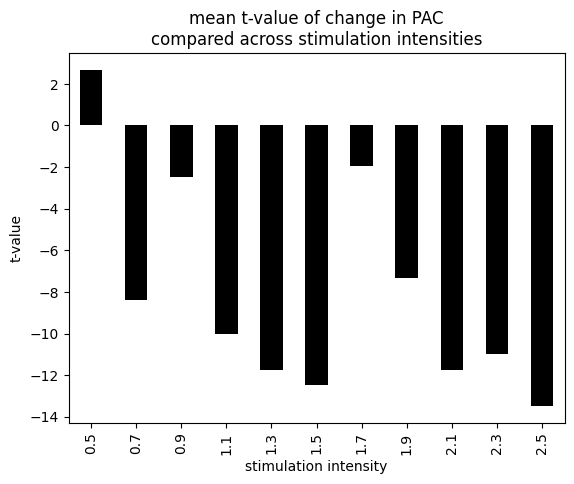

In [726]:
pvals[mask].join(fileindex[mask]['stimint']).groupby('stimint').mean()['t'].plot(kind='bar', color='k',
                                                                title='mean t-value of change in PAC\ncompared across stimulation intensities',
                                                                xlabel='stimulation intensity', ylabel='t-value');
plt.show()

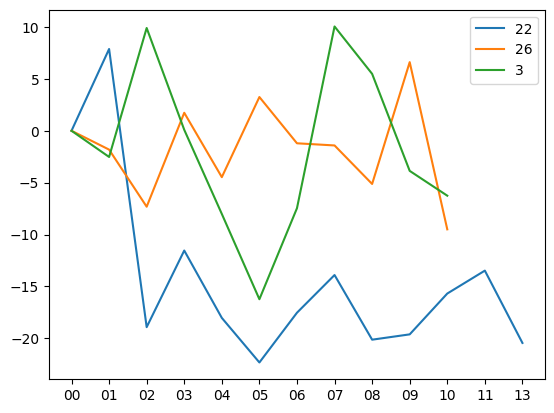

In [679]:
for i in pvals.index.get_level_values(0).unique():
    plt.plot(pvals.loc[i].index, pvals.loc[i].t, label=i);
plt.legend()
plt.show()

In [304]:
fig,ax=plt.subplots(figsize=(5,5))
sns.regplot(x='stimint', y='pacint', data=pacscore, ax=ax, color='k')
# [pacscore.plot(kind='scatter', x='stimint', y='pacint', ax=ax, legend=False, label=i) for i in pacscore.index.get_level_values(0).unique()]
# plt.legend()
ax.set(title='PAC score vs stim intensity\nall sessions for 3 subjects'); plt.show()

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

testing the first batch of results:

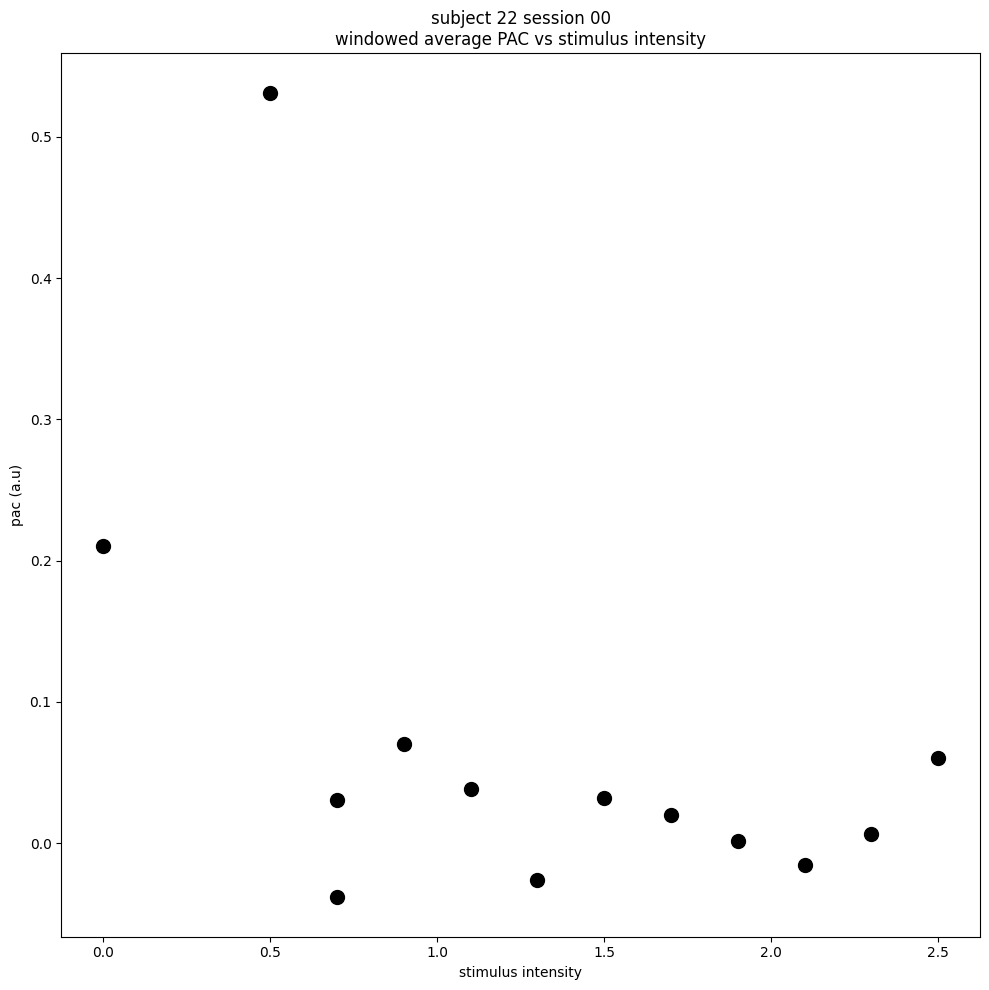

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
pacres[['stimint','pacint']].droplevel(0).plot(kind='scatter', x='stimint', y='pacint', ax=ax, c='k', s=100);
ax.set(xlabel='stimulus intensity', ylabel='pac (a.u)', title='subject {sid} session {sess}\nwindowed average PAC vs stimulus intensity'.format(sid=sid, sess=sess))
plt.tight_layout()
plt.show()

In [ ]:

for i in tqdm(fileindex.dropna(how='any').index[1:]):
    fif_file=fileindex.fifs.loc[i] ## path to preprocessed file
    epochs = mne.read_epochs(fif_file)
    _data = epochs.get_data()[:,14,:]
    
    sid=str(i[0])
    sess=str(i[1])
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 250, 5, 5), dcomplex='wavelet')
    print('starting the phase sims   ', end='\r')
    phases = p.filter(sf, _data, ftype='phase', n_jobs=8)
    print('starting the amps sims      ', end='\r')
    amplitudes = p.filter(sf, _data, ftype='amplitude', n_jobs=8)
    xpax = p.fit(phases, amplitudes)
    
    ## GET TOTAL PAC VAL FOR WINDOW AND PUT IN DF:
    _meanpax=pd.DataFrame(xpax.mean(-1), index=np.round(p.yvec, 1), columns=np.round(p.xvec, 1))
    _filtered=_meanpax.loc[amp_fs[0]:amp_fs[1], ph_fs[0]:ph_fs[1]]

    avgpxl=_filtered.sum().sum()/(_filtered.shape[0]*_filtered.shape[1]) # get the average pixel for the filtered window
    
    
    
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(pd.DataFrame(xpax.mean(-1), index=np.round(p.yvec, 1), columns=np.round(p.xvec, 1)), vmin=0, vmax=0.4, mask=p.pvalues==0);
    plt.xlabel('freq for phase')
    plt.ylabel('freq for amp')
    plt.title('comodulogram from 50-250\nsubject {sid} session {sess}'.format(sid=sid, sess=sess))
    ax.invert_yaxis()
    plt.show()

# Looking at the fig above:
Seems like the stack is actually working. 

This is for only positive values in the range of 0, 0.5 MI values

There's a weird ~32 Hz - 130 Hz positive result. 

#### Next step:
- try this with Sorenza's new preprocessed data
- check negatives too

after all this:
1. Get markers and data across files
2. Do the fitting across different trials
3. Get `np.trapz` (trapezoidal integration) across certain windows
   - (phase 25-30 Hz & amp 125 - 135 Hz)
   - fit a regression line across stimints
___

### Re-get preprocessed ones:

In [ ]:
preprocs=(glob.glob(os.path.abspath('./preprocessed_final/*final_2-epo.fif')))

In [ ]:
preprocs

['/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub26_ses05_final_2-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub22_ses07_final_2-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub26_ses00_final_2-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub26_ses10_final_2-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub22_ses05_final_2-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub26_ses09_final_2-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub22_ses03_final_2-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub26_ses06_final_2-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed_final/sub03_ses08_final_2-ep

In [ ]:
fifs=pd.DataFrame(preprocs, columns=['fifs'], 
                 index=pd.MultiIndex.from_tuples(
                     [(
                       str(int(i.split('/')[-1].split('_')[0][3:])),
                       str(i.split('/')[-1].split('_')[1][3:])
                       ) for i in preprocs],
                       names=['sid','sess']
                                                 )
                   ).sort_index()

In [ ]:
markers, npzs=finder(datapath)
marker_sids=pd.DataFrame([i.split("/")[-5] for i in markers], columns=['sid'])
npz_sids=pd.DataFrame([i.split("/")[-5] for i in npzs], columns=['sid'])
fs=marker_sids.join(pd.DataFrame(markers, columns=['markers'])).join(pd.DataFrame(npzs, columns=['npzs']).join(pd.DataFrame([i.split("/")[-1].split('_')[1] for i in markers], columns=['sess']))).set_index(['sid', 'sess']).sort_index()

Getting the markers, and preprocessed paths into one df:

In [ ]:
fileindex=fifs.join(fs)
hdrs=pd.DataFrame(index=fileindex.index, columns=['stimint', 'stimcont', 'clinscore', 'hemisphere', 'patientid'])
for ind in fileindex.index:
    _mfile=fileindex.loc[ind, 'markers']
    _marker=pd.read_pickle(_mfile)
    hdrs.loc[ind]['stimint']=_marker['stimInt']
    hdrs.loc[ind]['stimcont']=_marker['stimCont']
    hdrs.loc[ind]['clinscore']=_marker['clinScore']
    hdrs.loc[ind]['hemisphere']=_marker['hemisphere']
    hdrs.loc[ind]['patientid']=_marker['patientId']
fileindex=fileindex.join(hdrs)    

In [ ]:
fileindex

fifs  \
sid sess                                                      
22  00    /external/rprshnas01/netdata_kcni/jglab/Member...   
    01    /external/rprshnas01/netdata_kcni/jglab/Member...   
    02    /external/rprshnas01/netdata_kcni/jglab/Member...   
    03    /external/rprshnas01/netdata_kcni/jglab/Member...   
    04    /external/rprshnas01/netdata_kcni/jglab/Member...   
    05    /external/rprshnas01/netdata_kcni/jglab/Member...   
    06    /external/rprshnas01/netdata_kcni/jglab/Member...   
    07    /external/rprshnas01/netdata_kcni/jglab/Member...   
    08    /external/rprshnas01/netdata_kcni/jglab/Member...   
    09    /external/rprshnas01/netdata_kcni/jglab/Member...   
    10    /external/rprshnas01/netdata_kcni/jglab/Member...   
    11    /external/rprshnas01/netdata_kcni/jglab/Member...   
    13    /external/rprshnas01/netdata_kcni/jglab/Member...   
26  00    /external/rprshnas01/netdata_kcni/jglab/Member...   
    01    /external/rprshnas01/netdata_kcni/jglab/Member...   
    02    /external/rprshnas01/netdata_kcni/jglab/Member...   
    03    /external/rprshnas01/netdata_kcni/jglab/Member...   
    04    /external/rprshnas01/netdata_kcni/jglab/Member...   
    05    /external/rprshnas01/netdata_kcni/jglab/Member...   
    06    /external/rprshnas01/netdata_kcni/jglab/Member...   
    07    /external/rprshnas01/netdata_kcni/jglab/Member...   
    08    /external/rprshnas01/netdata_kcni/jglab/Member...   
    09    /external/rprshnas01/netdata_kcni/jglab/Member...   
    10    /external/rprshnas01/netdata_kcni/jglab/Member...   
3   07    /external/rprshnas01/netdata_kcni/jglab/Member...   
    08    /external/rprshnas01/netdata_kcni/jglab/Member...   
    09    /external/rprshnas01/netdata_kcni/jglab/Member...   
    10    /external/rprshnas01/netdata_kcni/jglab/Member...   

                                                    markers  \
sid sess                                                      
22  00    /external/rprshnas01/netdata_kcni/jglab/Member...   
    01    /external/rprshnas01/netdata_kcni/jglab/Member...   
    02    /external/rprshnas01/netdata_kcni/jglab/Member...   
    03    /external/rprshnas01/netdata_kcni/jglab/Member...   
    04    /external/rprshnas01/netdata_kcni/jglab/Member...   
    05    /external/rprshnas01/netdata_kcni/jglab/Member...   
    06    /external/rprshnas01/netdata_kcni/jglab/Member...   
    07    /external/rprshnas01/netdata_kcni/jglab/Member...   
    08    /external/rprshnas01/netdata_kcni/jglab/Member...   
    09    /external/rprshnas01/netdata_kcni/jglab/Member...   
    10    /external/rprshnas01/netdata_kcni/jglab/Member...   
    11    /external/rprshnas01/netdata_kcni/jglab/Member...   
    13    /external/rprshnas01/netdata_kcni/jglab/Member...   
26  00    /external/rprshnas01/netdata_kcni/jglab/Member...   
    01    /external/rprshnas01/netdata_kcni/jglab/Member...   
    02    /external/rprshnas01/netdata_kcni/jglab/Member...   
    03    /external/rprshnas01/netdata_kcni/jglab/Member...   
    04    /external/rprshnas01/netdata_kcni/jglab/Member...   
    05    /external/rprshnas01/netdata_kcni/jglab/Member...   
    06    /external/rprshnas01/netdata_kcni/jglab/Member...   
    07    /external/rprshnas01/netdata_kcni/jglab/Member...   
    08    /external/rprshnas01/netdata_kcni/jglab/Member...   
    09    /external/rprshnas01/netdata_kcni/jglab/Member...   
    10    /external/rprshnas01/netdata_kcni/jglab/Member...   
3   07    /external/rprshnas01/netdata_kcni/jglab/Member...   
    08    /external/rprshnas01/netdata_kcni/jglab/Member...   
    09    /external/rprshnas01/netdata_kcni/jglab/Member...   
    10    /external/rprshnas01/netdata_kcni/jglab/Member...   

                                                       npzs stimint stimcont  \
sid sess                                                                       
22  00    /external/rprshnas01/netdata_kcni/jglab/Member...       0        2   
    01    /external/rprshnas01/ne

1. Do the fitting across different subjects
2. Get `np.trapz` (trapezoidal integration) across certain windows

In [ ]:
mne.filter.create_filter(data=epochs, )

AttributeError: 'EpochsFIF' object has no attribute 'notch_filter'

In [ ]:
for i in tqdm(fileindex.index[0:1]):
    fif_file=fileindex.fifs.loc[i] ## path to preprocessed file
    epochs = mne.read_epochs(fif_file)
    epochs.
    _data = epochs.get_data()[:,14,:]
    
    sid=str(i[0])
    sess=str(i[1])
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 250, 5, 5), dcomplex='wavelet')
    print('starting the phase sims   ', end='\r')
    phases = p.filter(sf, _data, ftype='phase', n_jobs=8)
    print('starting the amps sims      ', end='\r')
    amplitudes = p.filter(sf, _data, ftype='amplitude', n_jobs=8)
    xpax = p.fit(phases, amplitudes)
    
    
    plt.figure(figsize=(10,10))
    sns.heatmap(pd.DataFrame(xpax.mean(-1), index=p.yvec, columns=p.xvec), vmax=0.5, vmin=-0);
    plt.xlabel('freq for phase')
    plt.ylabel('freq for amp')
    plt.title('comodulogram from 50-250\nsubject {sid} session {sess}'.format(sid=sid, sess=sess))
    plt.suptitle('')
    plt.show()

________________________
_________________________
________________

##### LEGACY:

In [ ]:
fig,axes=plt.subplots(ncols=5, nrows=3, figsize=(14,8))
phases = []
amplitudes = []
for j,processed_dir in enumerate(preprocs[0:2]):
    print('file no. {j}'.format(j=j), end='\r')
    ax=axes.ravel()[j]
    epochs = mne.read_epochs(processed_dir)
    cata_1_channel = epochs.get_data()[:,14,:]
    sf = 1000
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 150, 5, 5), dcomplex='wavelet')
    # etract all of the phases and amplitudes
    phases = p.filter(sf, cata_1_channel, ftype='phase', n_jobs=1)
    amplitudes = p.filter(sf, cata_1_channel, ftype='amplitude', n_jobs=1)
    xpax = p.fit(phases, amplitudes)
    # plt.subplot(3,5,i+1)
    p.comodulogram(xpax.mean(-1), title=f"subject xx, session xx", cmap='viridis',vmax=0.5,vmin=-0.5, ax_special=ax)

    

Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub02_ses06_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated


Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=7349)
/external/rprshnas01/kcni/tmor/scratch/mne/lib/python3.8/site-packages/joblib/externals/loky/backend/utils.py:62: UserWarning: Failed to kill subprocesses on this platform. Please installpsutil: https://github.com/giampaolo/psutil
Details:
Traceback (most recent call last):
  File "/external/rprshnas01/kcni/tmor/scratch/mne/lib/python3.8/site-packages/joblib/externals/loky/backend/utils.py", line 59, in _kill_process_tree_without_psutil
    _posix_recursive_kill(process.pid)
  File "/external/rprshnas01/kcni/tmor/scratch/mne/lib/python3.8/site-packages/joblib/externals/loky/backend/utils.py", line 110, in _posix_recursive_kill
    children_pids = subprocess.check_output(
  File "/opt/scc/conda/software/Python/3.8.5-Anaconda3-2021.03/lib/python3.8/subprocess

KeyboardInterrupt: 

**This is where the loop ends**
__________

Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=325)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=1227)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=6972)
    infer p-values

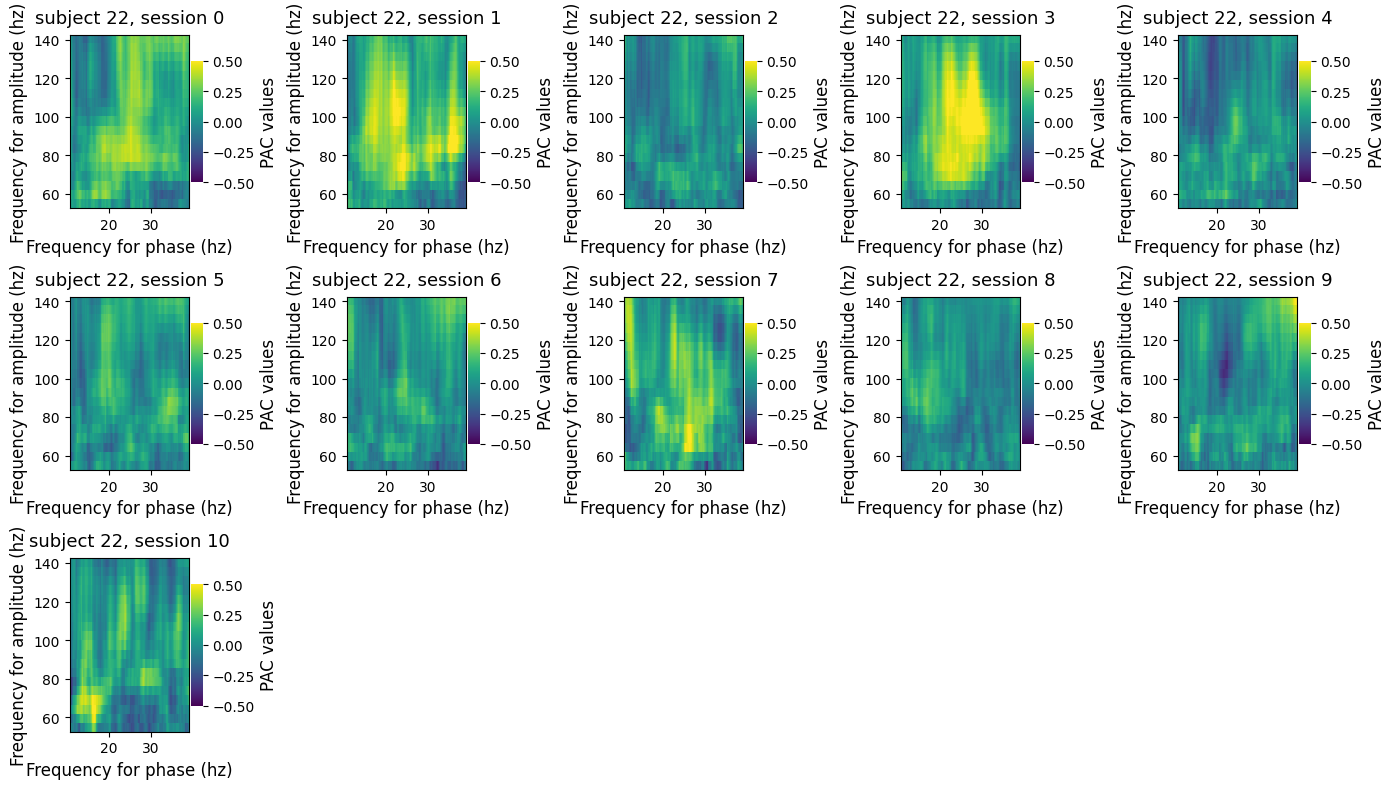

In [ ]:
phases = []
amplitudes = []
plt.figure(figsize=(14, 8))
for i in range(0,len(list_epochs)):   
    cata_1_channel = list_epochs[i]
    sf = 1000
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 150, 5, 5), dcomplex='wavelet')
    # etract all of the phases and amplitudes
    phases = p.filter(sf, cata_1_channel, ftype='phase', n_jobs=1)
    amplitudes = p.filter(sf, cata_1_channel, ftype='amplitude', n_jobs=1)
    xpax = p.fit(phases, amplitudes)
    plt.subplot(3,5,i+1)
    p.comodulogram(xpax.mean(-1), title=f"subject 22, session {i}", cmap='viridis',vmax=0.5,vmin=-0.5)
plt.tight_layout()    
plt.show()

Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=6356)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=2838)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=8491)
    infer p-value

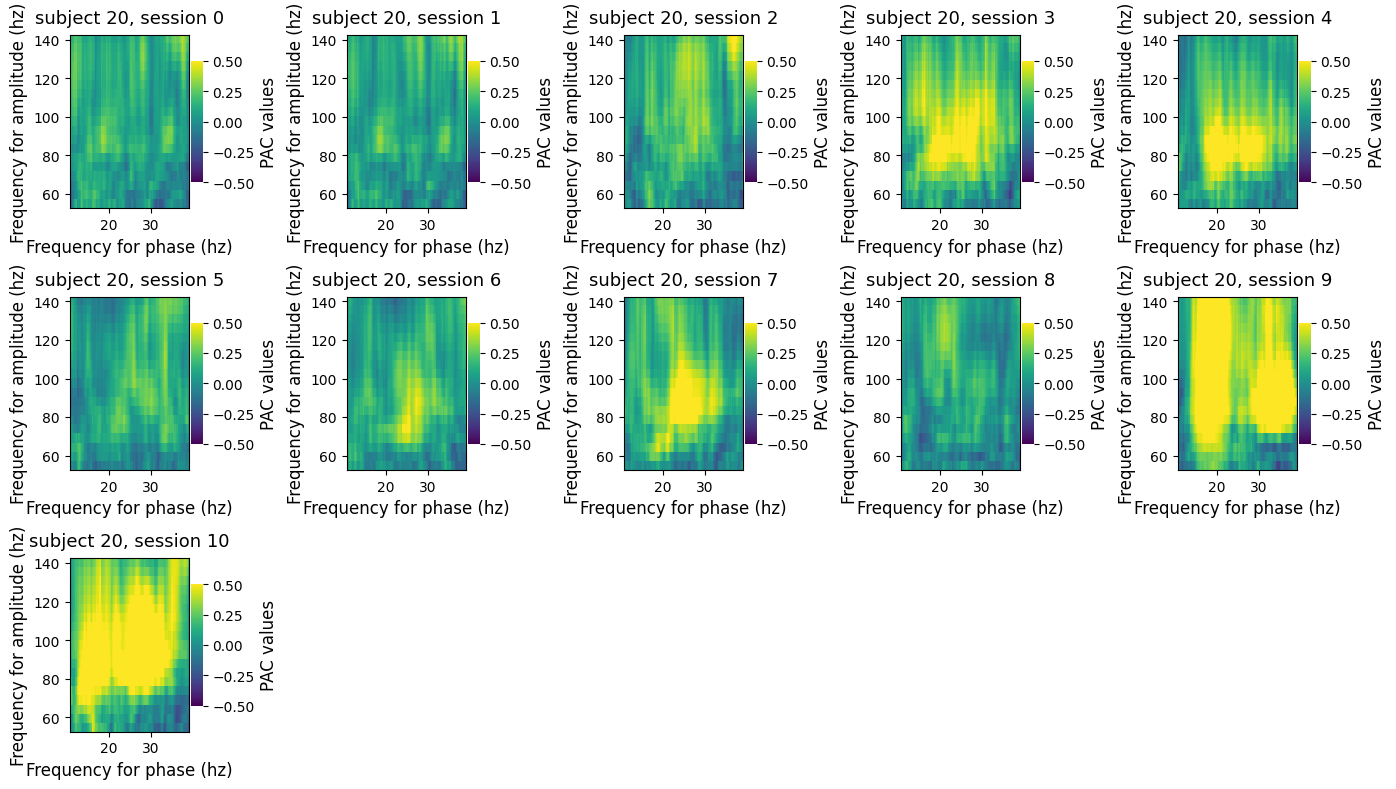

In [ ]:
phases = []
amplitudes = []
plt.figure(figsize=(14, 8))
for i in range(0,len(list_epochs)):   
    cata_1_channel = list_epochs[i]
    sf = 1000
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 150, 5, 5), dcomplex='wavelet')
    # etract all of the phases and amplitudes
    phases = p.filter(sf, cata_1_channel, ftype='phase', n_jobs=1)
    amplitudes = p.filter(sf, cata_1_channel, ftype='amplitude', n_jobs=1)
    xpax = p.fit(phases, amplitudes)
    plt.subplot(3,5,i+1)
    p.comodulogram(xpax.mean(-1), title=f"subject 20, session {i}", cmap='viridis',vmax=0.5,vmin=-0.5)
plt.tight_layout()    
plt.show()

Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=9157)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=3988)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
Phase Amplitude Coupling object defined
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=8511)
    infer p-value

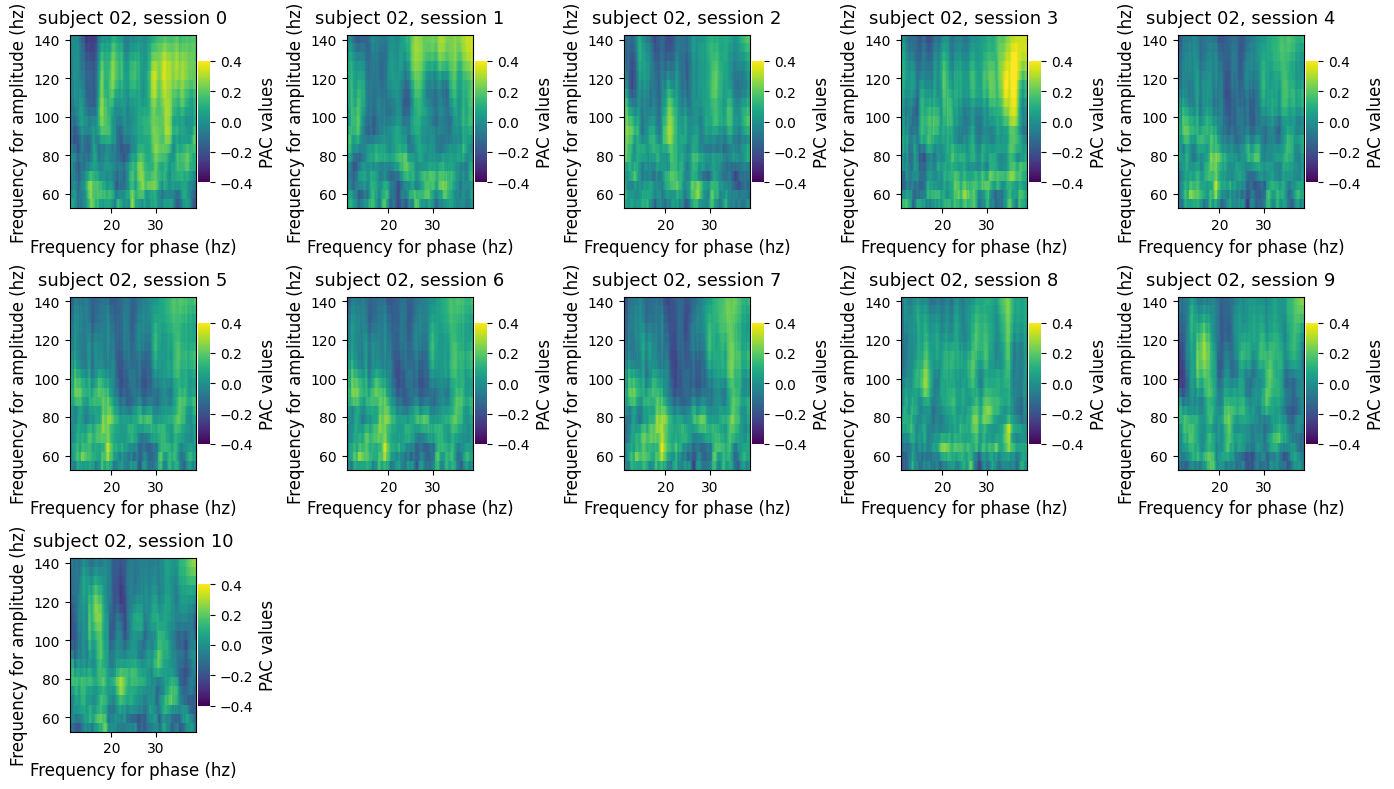

In [ ]:
phases = []
amplitudes = []
plt.figure(figsize=(14, 8))
for i in range(0,len(list_epochs)):   
    cata_1_channel = list_epochs[i]
    sf = 1000
    p = Pac(f_pha=(10, 40, 1, .2), f_amp=(50, 150, 5, 5), dcomplex='wavelet')
    # etract all of the phases and amplitudes
    phases = p.filter(sf, cata_1_channel, ftype='phase', n_jobs=1)
    amplitudes = p.filter(sf, cata_1_channel, ftype='amplitude', n_jobs=1)
    xpax = p.fit(phases, amplitudes)
    plt.subplot(3,5,i+1)
    p.comodulogram(xpax.mean(-1), title=f"subject 02, session {i}", cmap='viridis',vmax=0.4,vmin=-0.4)
plt.tight_layout()    
plt.show()

In [ ]:
xpax0 = p.fit(phases_0, amplitudes_0)
xpax5 = p.fit(phases_5, amplitudes_5)
xpax10 = p.fit(phases_10, amplitudes_10)


#p.comodulogram(xpac.mean(-1), title="hello", cmap='viridis')

    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=4778)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=9616)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surrogates)
    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=9739)
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract then divide by the mean of surroga

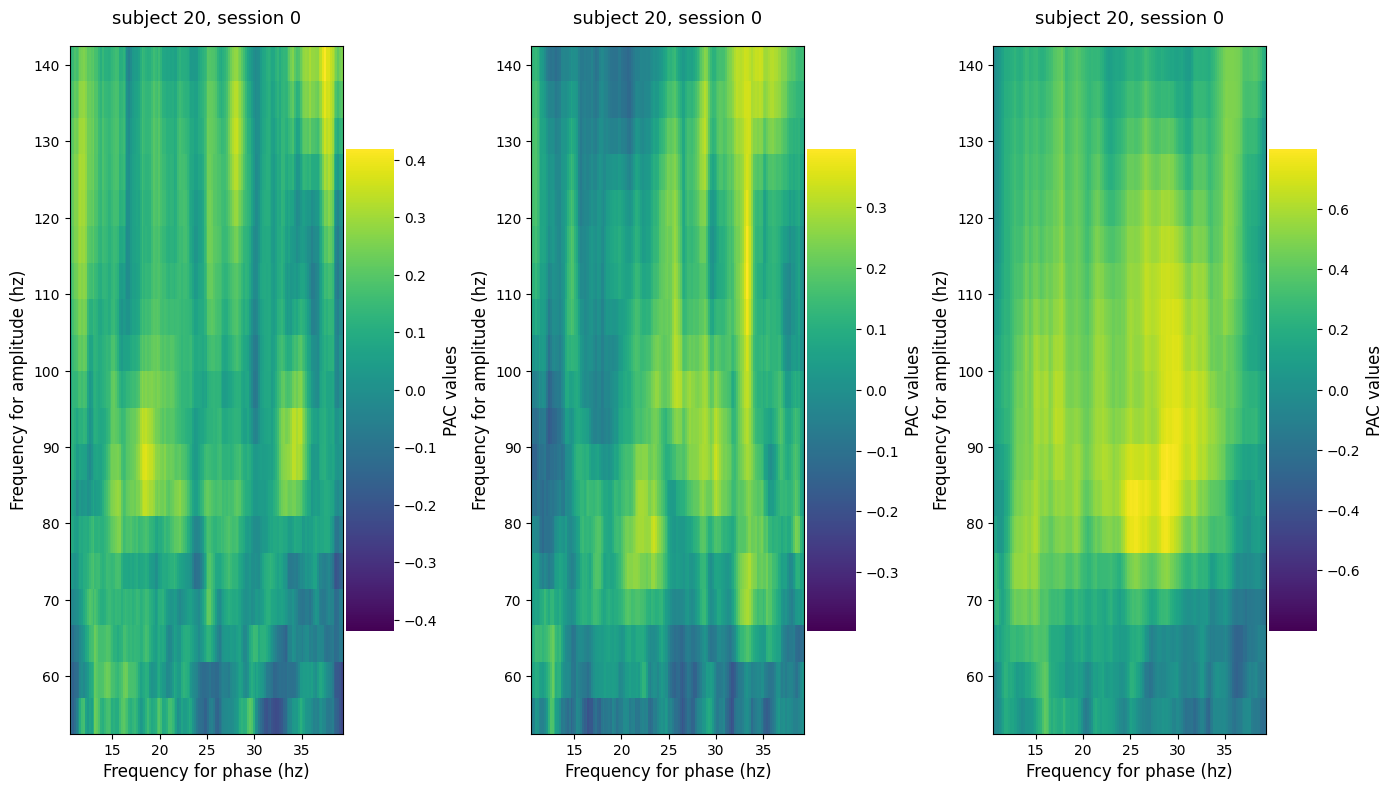

In [ ]:
# For session 0 subject 20
plt.figure(figsize=(14, 8))
plt.subplot(1,3,1)
p.comodulogram(xpax0.mean(-1), title="subject 20, session 0", cmap='viridis')
plt.subplot(1,3,2)
p.comodulogram(xpax5.mean(-1), title="subject 20, session 0", cmap='viridis')
plt.subplot(1,3,3)
p.comodulogram(xpax10.mean(-1), title="subject 20, session 0", cmap='viridis')
plt.tight_layout()
plt.show()

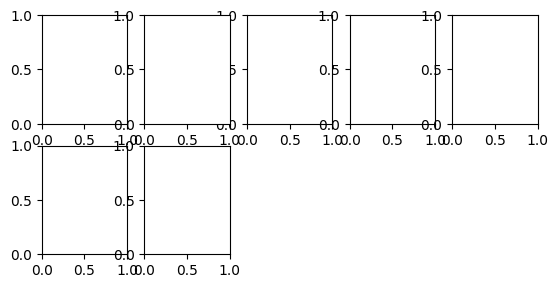

In [ ]:
plt.subplot(3,5,3)
plt.subplot(3,5,4)
plt.subplot(3,5,1)
plt.subplot(3,5,2)
plt.subplot(3,5,5)
plt.subplot(3,5,6)
plt.subplot(3,5,7)


plt.show()

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

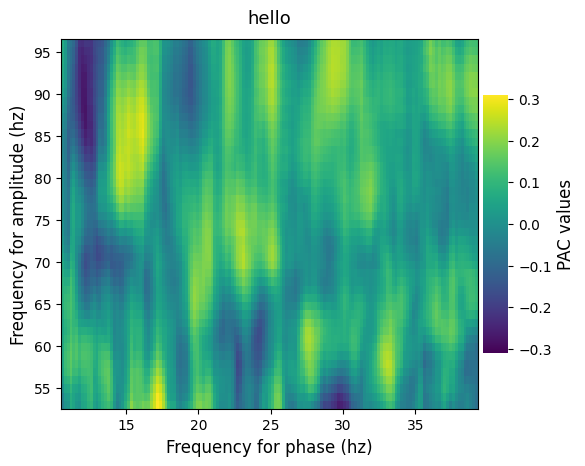

In [ ]:
# For session 0
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

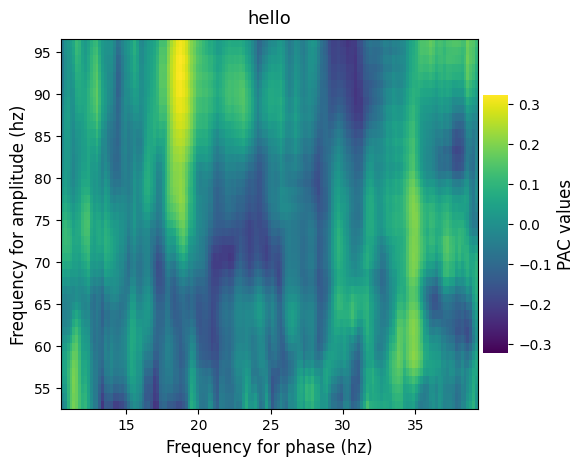

In [ ]:
#For session 5
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

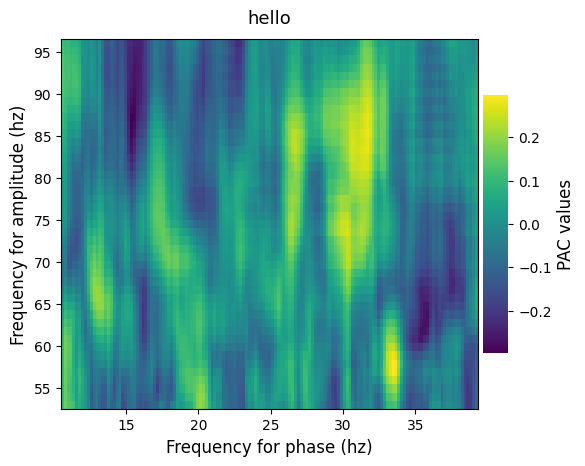

In [ ]:
#For session 10
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

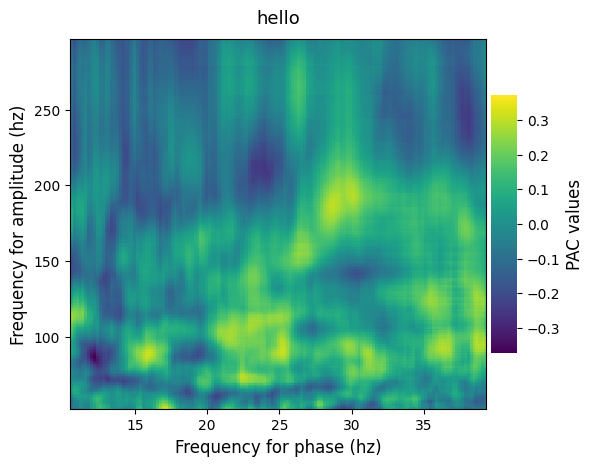

In [ ]:
# For session 0
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

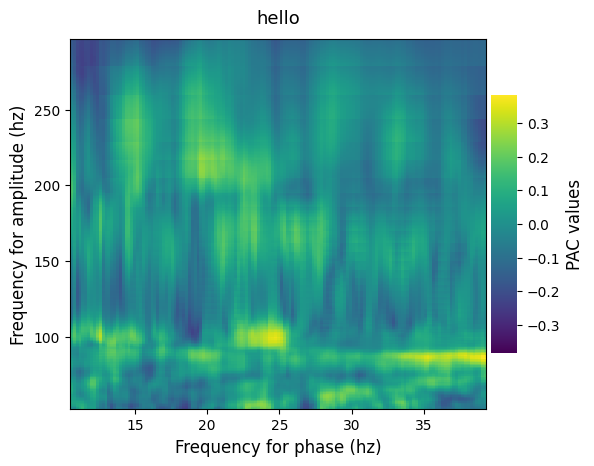

In [ ]:
# or session 5
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

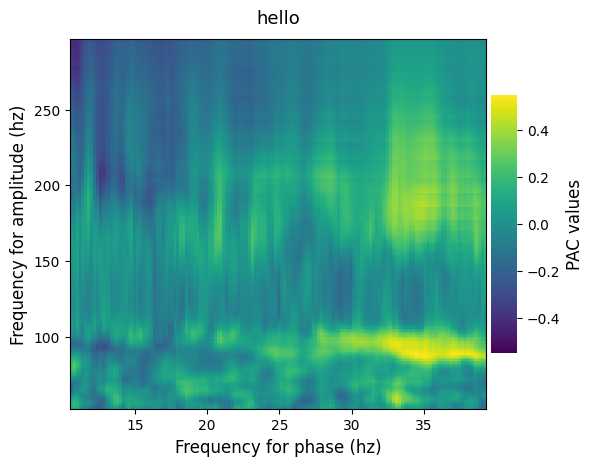

In [ ]:
#For session 10
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

<AxesSubplot: title={'center': 'hello'}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

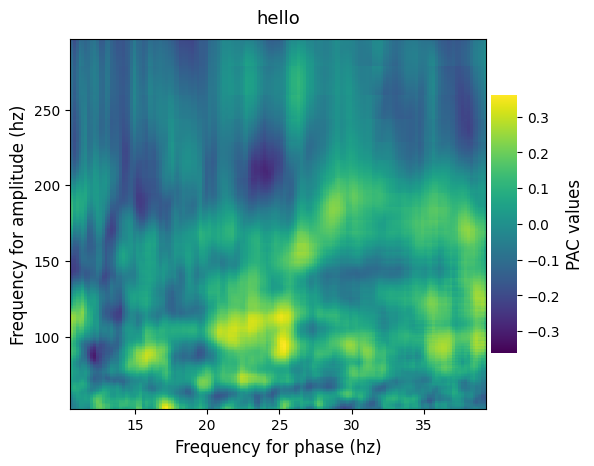

In [ ]:
# For session 0
p.comodulogram(xpax.mean(-1), title="hello", cmap='viridis')

In [ ]:
# define a :class:`tensorpac.Pac` object and use the MVL as the main method
# for measuring PAC
data = epochs.copy().get_data()[:,19,:]
sf=1000
p = Pac(idpac=(1, 0, 0), f_pha=(10, 40, 1, .2), f_amp=(50, 350, 5, 1),
        dcomplex='wavelet', width=12)

# Now, extract all of the phases and amplitudes
phases = p.filter(sf, data, ftype='phase')
amplitudes = p.filter(sf, data, ftype='amplitude')

WARNING | MVL is amplitude dependent which means that if the amplitude increases, MVL also increases. You should select a normalization method for correcting this limitation (e.g idpac=(1, 2, 4))
Phase Amplitude Coupling object defined


In [ ]:
epochs.get_data().shape

(28, 64, 9501)

WARNING | If you want to normalize the estimated PAC, you should select a surrogate method (second digit of `idpac`). Normalization ignored.
    true PAC estimation using Phase-Locking Value (PLV, Penny et al. 2008)
    true PAC estimation using Phase-Locking Value (PLV, Penny et al. 2008)
    compute surrogates (Permute phase across trials (Tort et al. 2010), 20 permutations, random_state=165)
WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract the mean of surrogates)
    true PAC estimation using Phase-Locking Value (PLV, Penny et al. 2008)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 20 permutations, random_state=6375)
WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surroga

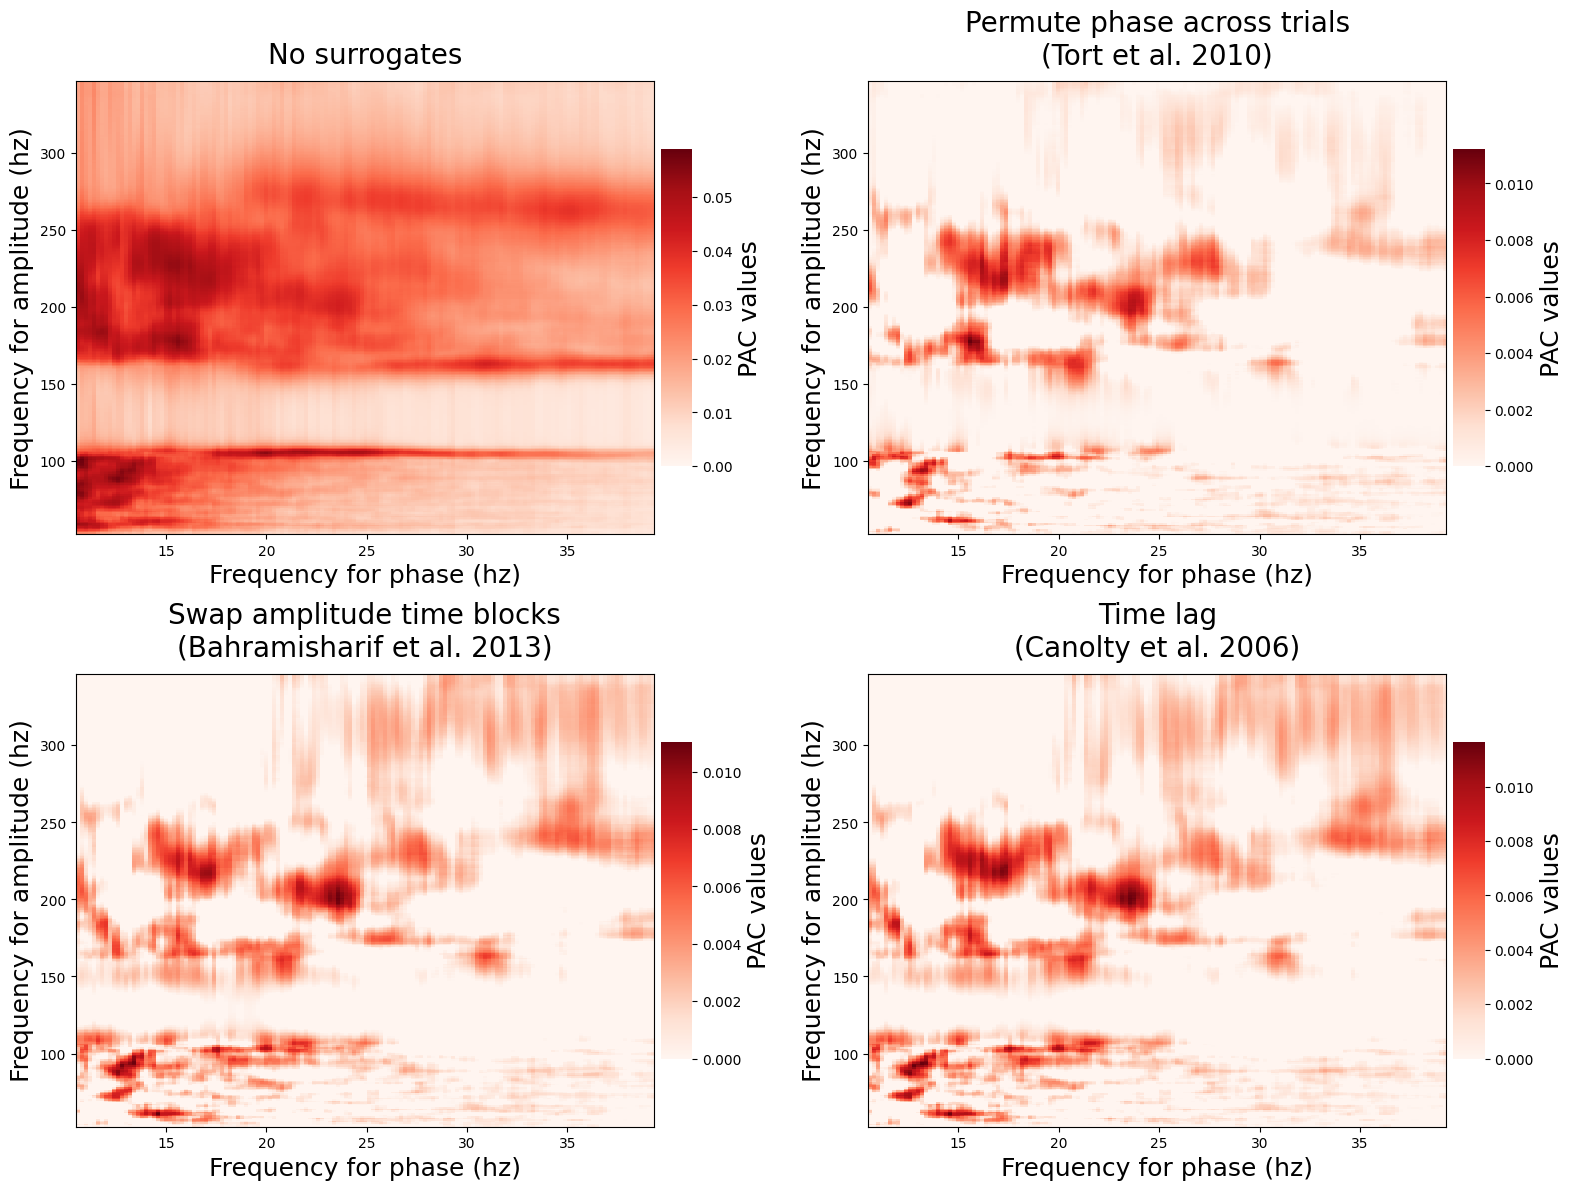

In [ ]:
plt.figure(figsize=(16, 12))
for i, k in enumerate(range(4)):
    # change the pac method
    p.idpac = (5, k, 1)
    # compute only the pac without filtering
    xpac = p.fit(phases, amplitudes, n_perm=20)
    # plot
    title = p.str_surro.replace(' (', '\n(')
    plt.subplot(2, 2, k + 1)
    p.comodulogram(xpac.mean(-1), title=title, cmap='Reds', vmin=0,
                   fz_labels=18, fz_title=20, fz_cblabel=18)

plt.tight_layout()

plt.show()